In [60]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLine2D


# py -m pip install matplotlib

In [61]:
df_private = pd.read_csv('df_private.txt', sep="\t")

In [62]:
df_private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118600 entries, 0 to 118599
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCT                    118600 non-null  object 
 1   Duration                   118600 non-null  object 
 2   Vehicle_age                118600 non-null  float64
 3   Make                       118600 non-null  object 
 4   GWP                        118600 non-null  float64
 5   vehicle_type_group_mapped  118600 non-null  object 
 6   number_of_claims           118600 non-null  float64
 7   Channel                    118600 non-null  object 
 8   Churn                      118600 non-null  int64  
 9   Renewal                    118600 non-null  int64  
 10  Policy_Duration            118600 non-null  int64  
 11  Gender                     118600 non-null  object 
 12  Client_Age                 118600 non-null  float64
 13  City                       11

In [44]:
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('6) Personal', 'Automobilis')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('5) Motorcycle', 'Motociklas')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('8) Tractor', 'Traktorius')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('7) Trailer', 'Kemperis')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('3) Delivery van', 'krovininis mikroautobusas')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('4) Full trailer', 'Priekaba')
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace('2) Truck over 3,5T', 'Sunkvežimis')

In [45]:
df_private['vehicle_type_group_mapped'] = df_private['vehicle_type_group_mapped'].str.replace(' ', '\n')

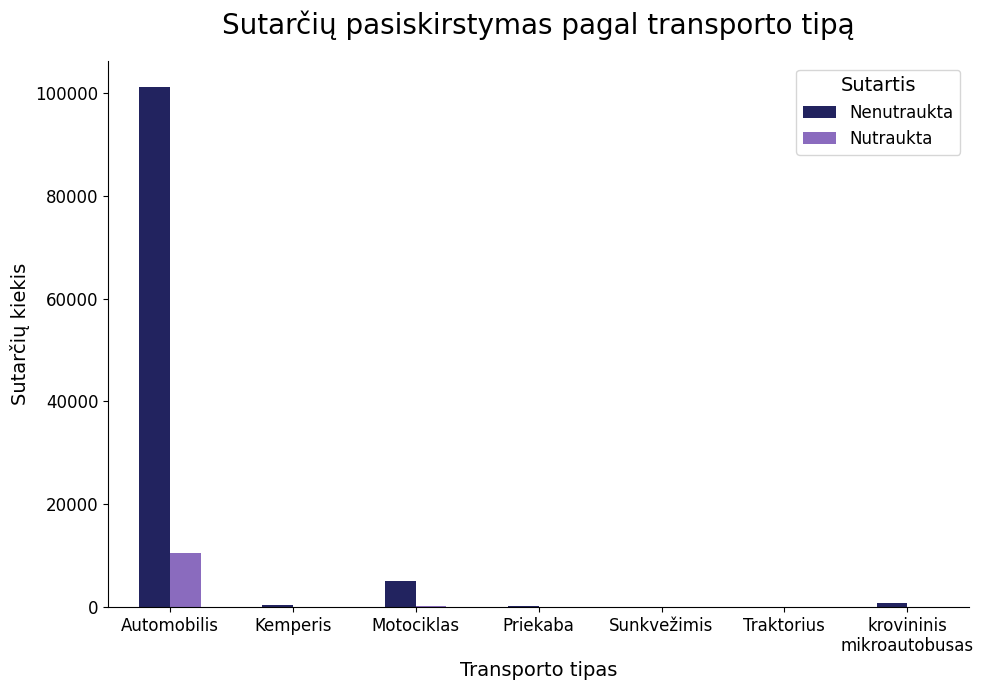

In [46]:
import matplotlib.pyplot as plt


product_churn = df_private.groupby(['vehicle_type_group_mapped', 'Churn']).size().unstack(fill_value=0)


colors = ['#22235F', '#8A6BBE']


ax = product_churn.plot(kind='bar', stacked=False, color=colors, figsize=(10, 7))
plt.title('Sutarčių pasiskirstymas pagal transporto tipą', fontsize=20, pad=20)
plt.xlabel('Transporto tipas', fontsize=14)
plt.ylabel('Sutarčių kiekis', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sutartis', labels=['Nenutraukta', 'Nutraukta'], fontsize=12, title_fontsize=14)
plt.tight_layout()


leg = ax.get_legend()
for text in leg.get_texts():
    text.set_color('black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


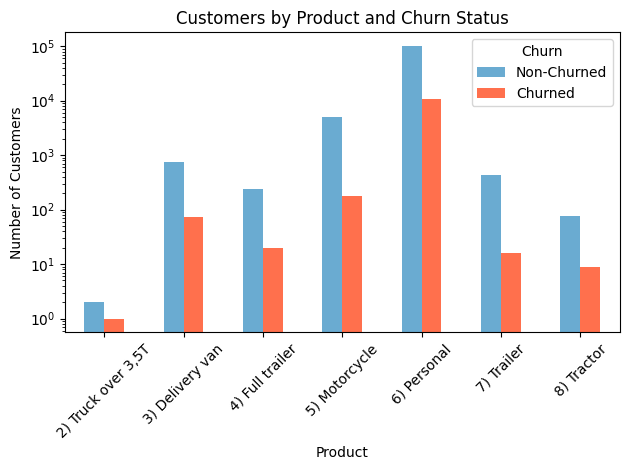

In [12]:
# Assuming df_private['Churn'] contains the churn data and df_private['PRODUCT'] contains the product data
product_churn = df_private.groupby(['Channel', 'Churn']).size().unstack(fill_value=0)

# Define colors matching the previous style
colors = ['#22235F', '#8A6BBE']

# Plotting the data
ax = product_churn.plot(kind='bar', stacked=False, color=colors, figsize=(10, 7))
plt.title('Sutarčių pasiskirstymas pagal pardavimų kanalą', fontsize=20, pad=30)
plt.xlabel('Pardavimų kanalas', fontsize=14)
plt.ylabel('Sutarčių kiekis', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sutartis', labels=['Nenutraukta', 'Nutraukta'], fontsize=12, title_fontsize=14)
plt.tight_layout()

# Adjusting text properties of the legend
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_color('black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [35]:
df_private['Channel'] = df_private['Channel'].str.replace('Key Account', 'Svarbių klientų')
df_private['Channel'] = df_private['Channel'].str.replace('Call Center', 'Skambučių centras')
df_private['Channel'] = df_private['Channel'].str.replace('E-Sales', 'El. Prekyba')
df_private['Channel'] = df_private['Channel'].str.replace('Broker', 'Brokeriai')
df_private['Channel'] = df_private['Channel'].str.replace('Affinity', 'Partnerių alternatyvių pardavimų')
df_private['Channel'] = df_private['Channel'].str.replace('Own Network', 'Pardavimų tinklas')
df_private['Channel'] = df_private['Channel'].str.replace('Direct Corporate Sales', 'Tiesioginių verslo klientų')

In [29]:
df_private['Channel'] = df_private['Channel'].str.replace('Key Account', 'Svarbių klientų')
df_private['Channel'] = df_private['Channel'].str.replace('Call Center', 'Skambučių centras')
df_private['Channel'] = df_private['Channel'].str.replace('E-Sales', 'El. Prekyba')
df_private['Channel'] = df_private['Channel'].str.replace('Broker', 'Brokeriai')
df_private['Channel'] = df_private['Channel'].str.replace('Partnerių ir alternatyvių pardavimų', 'Partnerių alternatyvių pardavimų')
df_private['Channel'] = df_private['Channel'].str.replace('Own Network', 'Pardavimų tinklas')
df_private['Channel'] = df_private['Channel'].str.replace('Direct Corporate Sales', 'Tiesioginių verslo klientų')

In [36]:
df_private['Channel'] = df_private['Channel'].str.replace(' ', '\n')

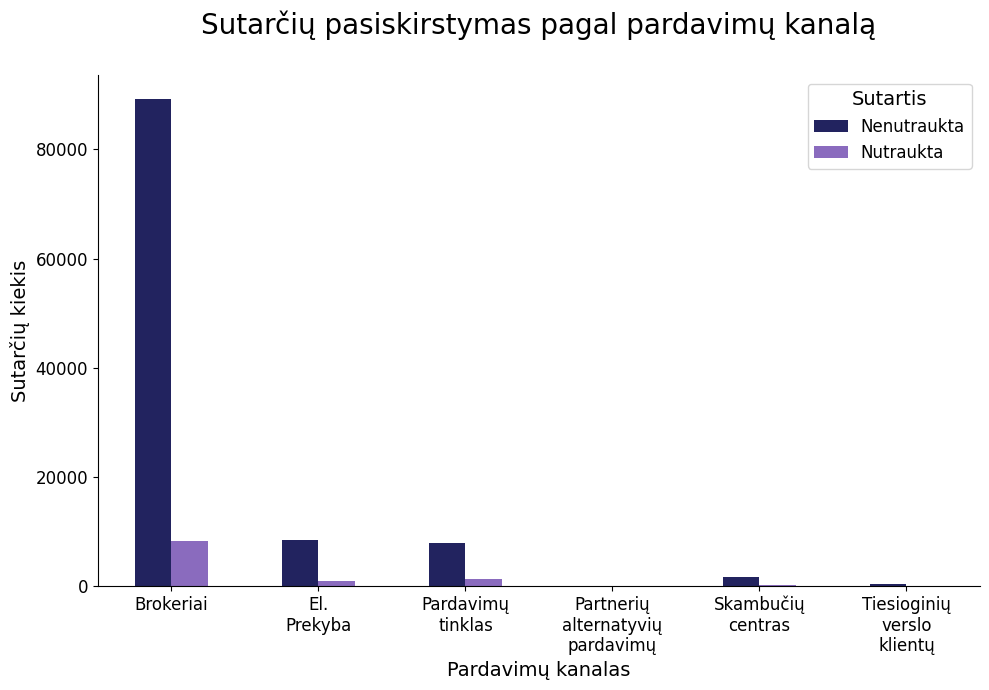

In [38]:
# Assuming df_private['Churn'] contains the churn data and df_private['PRODUCT'] contains the product data
product_churn = df_private.groupby(['Channel', 'Churn']).size().unstack(fill_value=0)

# Define colors matching the previous style
colors = ['#22235F', '#8A6BBE']

# Plotting the data
ax = product_churn.plot(kind='bar', stacked=False, color=colors, figsize=(10, 7))
plt.title('Sutarčių pasiskirstymas pagal pardavimų kanalą', fontsize=20, pad=30)
plt.xlabel('Pardavimų kanalas', fontsize=14)
plt.ylabel('Sutarčių kiekis', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sutartis', labels=['Nenutraukta', 'Nutraukta'], fontsize=12, title_fontsize=14)
plt.tight_layout()

# Adjusting text properties of the legend
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_color('black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


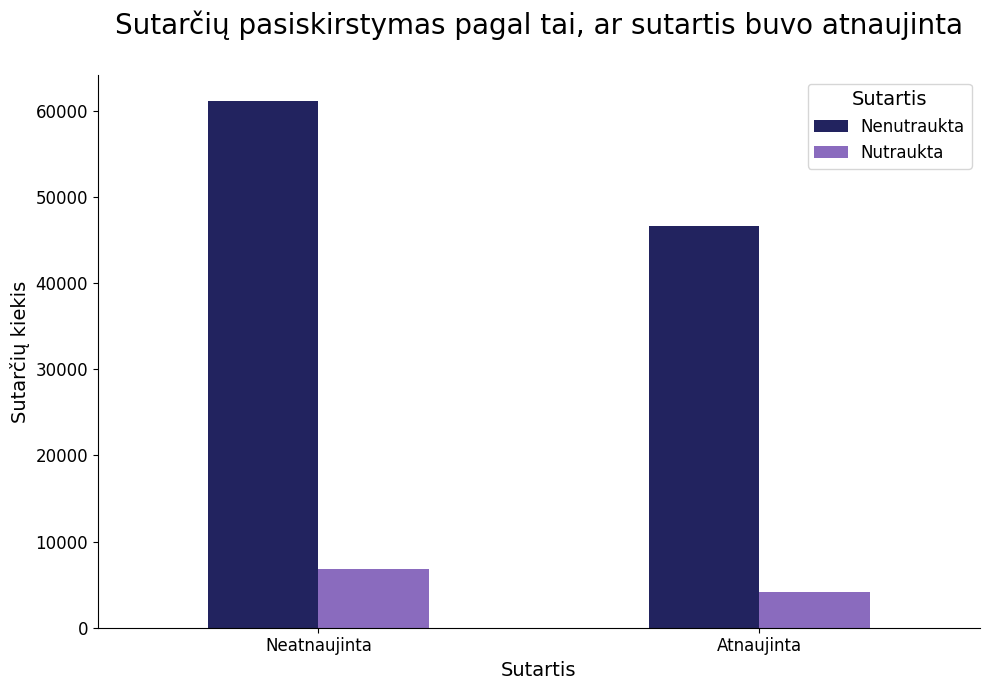

In [14]:
# Assuming df_private['Churn'] contains the churn data and df_private['PRODUCT'] contains the product data
product_churn = df_private.groupby(['Renewal', 'Churn']).size().unstack(fill_value=0)

# Define colors matching the previous style
colors = ['#22235F', '#8A6BBE']

# Plotting the data
ax = product_churn.plot(kind='bar', stacked=False, color=colors, figsize=(10, 7))
plt.title('Sutarčių pasiskirstymas pagal tai, ar sutartis buvo atnaujinta', fontsize=20, pad=30)
plt.xlabel('Sutartis', fontsize=14)
plt.ylabel('Sutarčių kiekis', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sutartis', labels=['Nenutraukta', 'Nutraukta'], fontsize=12, title_fontsize=14)
plt.tight_layout()

# Adjusting text properties of the legend
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_color('black')

# Set custom x-axis labels
product_labels = ['Neatnaujinta', 'Atnaujinta']  # Replace with your actual product names
ax.set_xticklabels(product_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [66]:
df_private_MTPL = pd.read_csv('df_private.txt', sep="\t")

df_private_MTPL['Vehicle_age'] = pd.to_numeric(df_private_MTPL['Vehicle_age'], errors='coerce')
df_private_MTPL['GWP'] = pd.to_numeric(df_private_MTPL['GWP'], errors='coerce')
df_private_MTPL['number_of_claims'] = pd.to_numeric(df_private_MTPL['number_of_claims'], errors='coerce')
df_private_MTPL['Client_Age'] = pd.to_numeric(df_private_MTPL['Client_Age'], errors='coerce')
df_private_MTPL['Policy_Duration'] = pd.to_numeric(df_private_MTPL['Policy_Duration'], errors='coerce')
df_private_MTPL['Years_of_driving'] = pd.to_numeric(df_private_MTPL['Years_of_driving'], errors='coerce')

df_private_MTPL['PRODUCT'] = pd.Categorical(df_private_MTPL['PRODUCT'])
df_private_MTPL['Duration'] = pd.Categorical(df_private_MTPL['Duration'])
df_private_MTPL['Make'] = pd.Categorical(df_private_MTPL['Make'])
df_private_MTPL['vehicle_type_group_mapped'] = pd.Categorical(df_private_MTPL['vehicle_type_group_mapped'])
df_private_MTPL['City'] = pd.Categorical(df_private_MTPL['City'])
df_private_MTPL['Churn'] = pd.Categorical(df_private_MTPL['Churn'])
df_private_MTPL['Renewal'] = pd.Categorical(df_private_MTPL['Renewal'])
df_private_MTPL['Gender'] = pd.Categorical(df_private_MTPL['Gender'])
df_private_MTPL['Channel'] = pd.Categorical(df_private_MTPL['Channel'])


In [67]:
new_column_names = {
    'Vehicle_age': 'TP amžius',
    'GWP': 'GWP',
    'number_of_claims': 'Žalų skaičius',
    'Policy_Duration': 'Poliso trukmė',
    'Client_Age': 'Asmens amžius',
    'Years_of_driving': 'Vairavimo stažas'
}
df_private_MTPL.rename(columns=new_column_names, inplace=True)


In [ ]:
# Assuming df_private['Churn'] contains the churn data and df_private['PRODUCT'] contains the product data
product_churn = df_private.groupby(['Renewal', 'Churn']).size().unstack(fill_value=0)

# Define colors matching the previous style
colors = ['#22235F', '#8A6BBE']

# Plotting the data
ax = product_churn.plot(kind='bar', stacked=False, color=colors, figsize=(10, 7))
plt.title('Sutarčių pasiskirstymas pagal tai, ar sutartis buvo atnaujinta', fontsize=20, pad=30)
plt.xlabel('Sutartis', fontsize=14)
plt.ylabel('Sutarčių kiekis', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sutartis', labels=['Nenutraukta', 'Nutraukta'], fontsize=12, title_fontsize=14)
plt.tight_layout()

# Adjusting text properties of the legend
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_color('black')

# Set custom x-axis labels
product_labels = ['Neatnaujinta', 'Atnaujinta']  # Replace with your actual product names
ax.set_xticklabels(product_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


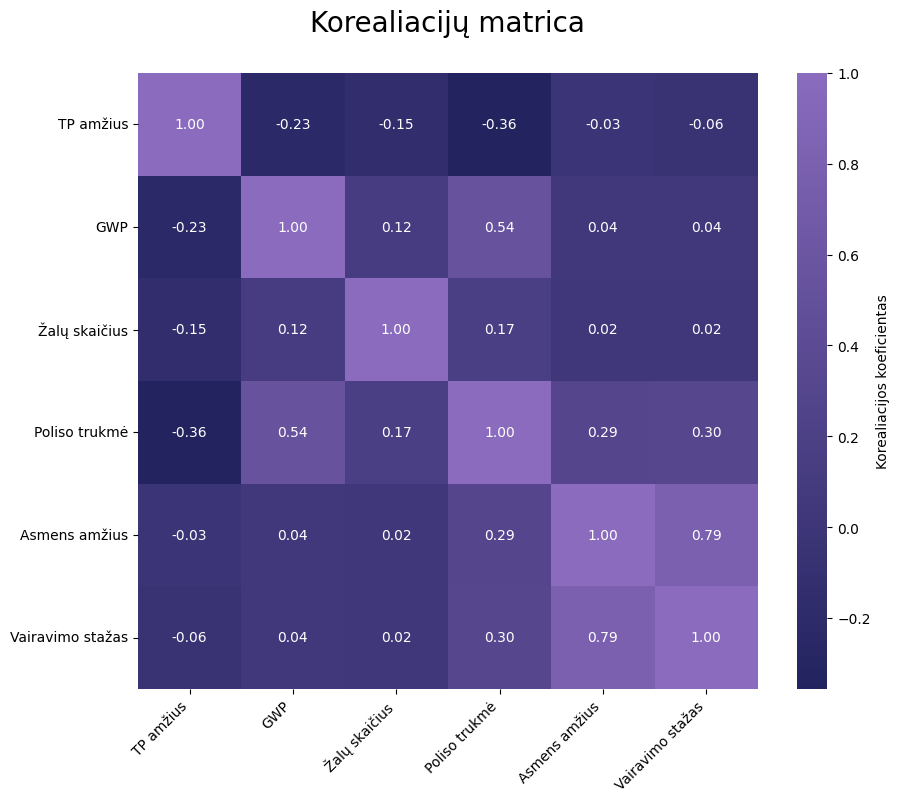

In [71]:
numerical_df = df_private_MTPL.select_dtypes(include=[np.number])  
from matplotlib.colors import LinearSegmentedColormap


corr_matrix = numerical_df.corr().fillna(0)

colors = ['#22235F', '#8A6BBE']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=custom_cmap,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cbar_kws={'label': 'Korealiacijos koeficientas'})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Korealiacijų matrica', fontsize=20, pad=30)

plt.show()